<a href="https://colab.research.google.com/github/Uniholder/DeepLearningSchool/blob/main/14_3D_ML_project/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зависимости для frankmocap

In [ ]:
%%time 
# 15 minutes
!pip install torch==1.7.1 torchvision==0.8.2 #pytorch3d
!pip install "git+https://github.com/facebookresearch/pytorch3d.git" # 0.4.0

In [ ]:
%%time 
# 4 minutes
!sudo apt-get install ffmpeg libosmesa6-dev
!git clone https://github.com/facebookresearch/frankmocap.git 
!pip install -r frankmocap/docs/requirements.txt 
!(cd frankmocap/ && sh scripts/install_frankmocap.sh) 
!mkdir frankmocap/extra_data/smpl/ 
!gdown --id 1t4tvZCbRT37iBOpVCoOBHHQ4D6KsOAz3 -O frankmocap/extra_data/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
!gdown --id 10cEgesBBsd-NyDyCUsvYoA58TQXynjJT -O frankmocap/extra_data/smpl/SMPLX_NEUTRAL.pkl
# !gdown --id 1hdUSTIQlwasSh41sGTockNApgINNEXGG -O frankmocap/extra_data/smpl/J_regressor_extra_smplx.npy
# !gdown --id 16kMiHFR0BUxc3AcWUdm46DdOA0ieOVP8 # -O smplx-03-28-46060-w_spin_mlc3d_46582-2089_2020_03_28-21_56_16.pt
!sudo apt-get install -y xvfb
!pip install torchgeometry

Зависимости для MGN

In [ ]:
%%time 
# 8 minutes
!git clone https://github.com/bharat-b7/MultiGarmentNetwork.git
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip
!unzip Multi-Garmentdataset.zip
!rm Multi-Garmentdataset.zip
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip
!unzip Multi-Garmentdataset_02.zip
!rm Multi-Garmentdataset_02.zip
!gdown --id 1t4tvZCbRT37iBOpVCoOBHHQ4D6KsOAz3 -O MultiGarmentNetwork/assets/neutral_smpl.pkl
!git clone https://github.com/pmh47/dirt.git
!sed -i 's|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_30 --expt-relaxed-constexpr -DNDEBUG")|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_60 --expt-relaxed-constexpr -DNDEBUG")|' dirt/csrc/CMakeLists.txt
!(cd dirt && pip install .)
!git clone https://github.com/MPI-IS/mesh.git
!sudo apt-get install libboost-dev # don't need on colab
!(cd mesh/ && BOOST_INCLUDE_DIRS=/usr/lib/x86_64-linux-gnu/ make all)
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/weights.zip
!unzip weights.zip
!rm weights.zip
!mv Multi-Garment\ Network/test_data.pkl MultiGarmentNetwork/test_data.pkl
!mv Multi-Garment\ Network/saved_model/ MultiGarmentNetwork/saved_model/
!mv Multi-Garment\ Network/assets/* MultiGarmentNetwork/assets/
!rm -r Multi-Garment\ Network/
!sudo apt-get install -y xvfb
!sed -i "s|import cPickle as pkl|import _pickle as pkl|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|/BS/bharat/work/MGN_release/||" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan.show()|scan.show().save_snapshot('scan.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan2.show()|scan2.show().save_snapshot('scan2.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pkl|import _pickle as pkl|' {} \;
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pickle|import _pickle as pickle|' {} \;
!sudo apt-get install -qq libboost-dev xvfb libosmesa6-dev
!pip install chumpy opendr
!find ./ -type f -name "*.py" -exec sed -i "s|from verts|from .verts|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|^import lbs$|from . import lbs|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from posemapper|from .posemapper|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from serialization|from .serialization|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_final_release/|MultiGarmentNetwork/|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/RVH/work/data/smpl_models/neutral/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl|MultiGarmentNetwork/assets/neutral_smpl.pkl|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_release/||" {} \;
!find ./ -type f -name "*.py" -exec sed -i -r s/pkl\.load[\(]open[\(]\(.+\)[\)][\)]/pkl.load\(open\(\\1,\ \'rb\'\)\ ,\ encoding=\'latin1\'\)/g  {} \;

In [4]:
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\])|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\]); mvs\[0\]\[1\].save_snapshot('garment_org_body.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\])|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\]); mvs\[0\]\[2\].save_snapshot('garment_org_body_garment_posed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('garment_unposed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!find ./ -type f -name "*.py" -exec sed -i "s|assets/garment_fts.pkl|MultiGarmentNetwork/assets/garment_fts.pkl|" {} \;
!mv MultiGarmentNetwork/ frankmocap/

In [ ]:
%cd frankmocap/
!find ./ -type f -name "*.py" -exec sed -i "s|from lib|from MultiGarmentNetwork.lib|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from utils|from MultiGarmentNetwork.utils|" {} \;
!gdown --id 1MJvUfKv8goKY-fOKu5POE3oQsZbRWe2Y -O MultiGarmentNetwork/dress_SMPL.py
!gdown --id 1ZL0xa0CZwS5i82fBNwbvvUi8yYFFcQsw -O renderer/p3d_renderer.py
!gdown --id 1l0PyKyVqFKzTbiur_JwHble5Kke6-7OI -O renderer/screen_free_visualizer.py
# # !sed -i "s|vis_hand_bbox = True,|vis_hand_bbox = True,\ntexture_rgb = None,|" renderer/screen_free_visualizer.py
# # !sed -i "s|def __render_pred_verts(self, img_original, pred_mesh_list):|def __render_pred_verts(self, img_original, pred_mesh_list, texture_rgb):|" renderer/screen_free_visualizer.py
# # !sed -i "s|rend_img = self.__render_pred_verts(input_img, pred_mesh_list)|rend_img = self.__render_pred_verts(input_img, pred_mesh_list, texture_rgb)|" renderer/screen_free_visualizer.py
# # !sed -i "s|rend_img = self.renderer.render(verts, faces, rend_img)|rend_img = self.renderer.render(verts, faces, rend_img, texture_rgb)|" renderer/screen_free_visualizer.py
# # !sed -i "s|def render(self, verts, faces, bg_img):|def render(self, verts, faces, bg_img, texture_rgb):|" renderer/p3d_renderer.py
# # !sed -i "s|textures = Textures(verts_rgb = mesh_color)|textures = Textures(verts_rgb = torch.from_numpy(texture_rgb).float().to(self.device))|" renderer/p3d_renderer.py

**---Рестрарт среды выполнения colab---**

In [1]:
!pwd

/content


In [2]:
%cd frankmocap/

/content/frankmocap


In [3]:
import torch
import numpy as np
import cv2
# import argparse
import _pickle as pkl

from demo.demo_options import DemoOptions
from bodymocap.body_mocap_api import BodyMocap
from bodymocap.body_bbox_detector import BodyPoseEstimator
import mocap_utils.demo_utils as demo_utils
import mocap_utils.general_utils as gnu
from mocap_utils.timer import Timer

from renderer.screen_free_visualizer import Visualizer
from renderer import p3d_renderer

from mocap_utils.coordconv import convert_smpl_to_bbox, convert_bbox_to_oriIm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


from os.path import exists, join, split
from glob import glob
from psbody.mesh import Mesh, MeshViewer, MeshViewers

from MultiGarmentNetwork.utils.smpl_paths import SmplPaths
from MultiGarmentNetwork.lib.ch_smpl import Smpl
from MultiGarmentNetwork.dress_SMPL import load_smpl_from_file, pose_garment, dress
from MultiGarmentNetwork.utils.interpenetration_ind import remove_interpenetration_fast

from IPython.display import Image


# Set bbox detector
body_bbox_detector = BodyPoseEstimator()

use_smplx = False # штаны съезжают в smplx

# Set mocap regressor
if use_smplx:
    checkpoint_path = './extra_data/body_module/pretrained_weights/smplx-03-28-46060-w_spin_mlc3d_46582-2089_2020_03_28-21_56_16.pt'
else:
    checkpoint_path = './extra_data/body_module/pretrained_weights/2020_05_31-00_50_43-best-51.749683916568756.pt'
smpl_dir = './extra_data/smpl/'
body_mocap = BodyMocap(checkpoint_path, smpl_dir, device, use_smplx=use_smplx)

visualizer = Visualizer('pytorch3d')


# MGN
path = '../Multi-Garment_dataset/'
garment_classes = ['Pants', 'ShortPants', 'ShirtNoCoat', 'TShirtNoCoat', 'LongCoat']
gar_dict = {}
for gar in garment_classes:
    gar_dict[gar] = glob(join(path, '*', gar + '.obj'))

dp = SmplPaths()
# vt, ft = dp.get_vt_ft_hres()
dpghsmd = dp.get_hres_smpl_model_data()
smpl = Smpl(dpghsmd)

## This file contains correspondances between garment vertices and smpl body
fts_file = 'MultiGarmentNetwork/assets/garment_fts.pkl'
vert_indices, fts = pkl.load(open(fts_file, 'rb') , encoding='latin1')
# fts['naked'] = ft

Loading Body Pose Estimator


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


**Выбрать тип одежды из списка:**
- Pants
- ShortPants
- ShirtNoCoat
- TShirtNoCoat
- LongCoat

In [4]:
garment_type = 'LongCoat'

In [9]:
## Choose any garmet type as source
# garment_type = 'LongCoat'
index = np.random.randint(0, len(gar_dict[garment_type]))   ## Randomly pick from the digital wardrobe
# index = 0
path = split(gar_dict[garment_type][index])[0]
    
garment_org_body_unposed = load_smpl_from_file(join(path, 'registration.pkl'))
garment_org_body_unposed.pose[:] = 0
garment_org_body_unposed.trans[:] = 0
garment_org_body_unposed = Mesh(garment_org_body_unposed.v, garment_org_body_unposed.f)

garment_unposed = Mesh(filename=join(path, garment_type + '.obj'))
garment_tex = join(path, 'multi_tex.jpg')
# tgt_body = Mesh(smpl.r, smpl.f)

vert_inds = vert_indices[garment_type]
garment_unposed.set_texture_image(garment_tex)

**Указать путь к видео на вход и на выход:**

In [10]:
video_input = './sample_data/han_short.mp4'
video_output = './mocap_output/han_short.mp4'

In [ ]:
%%time
# 7 секунд видео за Wall time: 8min 52s
# ~3 секунды на фрейм
start_frame = 0
cur_frame = start_frame
video_frame = 0
timer = Timer()

class Args():
    def __init__(self):
        self.input_path = video_input
        self.input_type = 'video'
        self.save_frame = False
        self.out_dir = './mocap_output'
        self.end_frame = float('inf')
        self.save_bbox_output = False
        self.single_person = False
        self.no_display = True
        self.save_pred_pkl = True
        self.use_smplx = True
        self.save_mesh = True
        self.no_video_out = False

args = Args()

use_smplx = args.use_smplx
        
input_type, input_data = demo_utils.setup_input(args)

while True:
    timer.tic()
    # load data
    if input_type == 'video':      
        _, img_original_bgr = input_data.read()
        if video_frame < cur_frame:
            video_frame += 1
            continue
        # save the obtained video frames
        image_path = join(args.out_dir, "frames", f"{cur_frame:05d}.jpg")
        if img_original_bgr is not None:
            video_frame += 1
            if args.save_frame:
                gnu.make_subdir(image_path)
                cv2.imwrite(image_path, img_original_bgr)
    elif input_type =='image_dir':
        if cur_frame < len(input_data):
            image_path = input_data[cur_frame]
            img_original_bgr  = cv2.imread(image_path)
        else:
            img_original_bgr = None
    else:
        assert False, "Unknown input_type"

    cur_frame +=1
    if img_original_bgr is None or cur_frame > args.end_frame:
        break   
    print("--------------------------------------")

    body_pose_list, body_bbox_list = body_bbox_detector.detect_body_pose(img_original_bgr)

    if len(body_bbox_list) < 1: 
        print(f"No body detected: {image_path}")
        continue

    #Sort the bbox using bbox size 
    # (to make the order as consistent as possible without tracking)
    bbox_size =  [(x[2] * x[3]) for x in body_bbox_list]
    idx_big2small = np.argsort(bbox_size)[::-1]
    body_bbox_list = [ body_bbox_list[i] for i in idx_big2small ]
    if args.single_person and len(body_bbox_list) > 0:
        body_bbox_list = [body_bbox_list[0], ]       

    # Body Pose Regression
    pred_output_list = body_mocap.regress(img_original_bgr, body_bbox_list)
    assert len(body_bbox_list) == len(pred_output_list)
    
    # extract mesh for rendering (vertices in image space and faces) from pred_output_list
    pred_mesh_list_body = demo_utils.extract_mesh_from_output(pred_output_list)
        
    smpl.pose[:] = pred_output_list[0]['pred_body_pose'][0]
    smpl.betas[:] = pred_output_list[0]['pred_betas'][0]
    smpl.trans[:] = 0
    
    new_garment = dress(smpl, garment_org_body_unposed, garment_unposed, vert_inds, garment_tex, dpghsmd)

    camScale = pred_output_list[0]['pred_camera'][0]
    camTrans = pred_output_list[0]['pred_camera'][1:]

    pred_vertices_bbox = convert_smpl_to_bbox(new_garment.v, camScale, camTrans)
    pred_vertices_img = convert_bbox_to_oriIm(pred_vertices_bbox, pred_output_list[0]['bbox_scale_ratio'], 
                                          pred_output_list[0]['bbox_top_left'], img_original_bgr.shape[1], img_original_bgr.shape[0])
    
    pred_mesh_list_garment = list()
    pred_mesh_list_garment.append(dict(
        vertices = pred_vertices_img,
        faces = new_garment.f.astype(np.int32)
    ))

    texture_coordinates = np.array([a[0] for a in new_garment.texture_coordinates_by_vertex()])
    texture_rgb = new_garment.texture_rgb_vec(texture_coordinates)

    # visualization
#     res_img, mesh = visualizer.visualize(
#         img_original_bgr,
#         pred_mesh_list = pred_mesh_list_garment,
#         texture_rgb = np.expand_dims(texture_rgb, 0)
#     )

    res_img = visualizer.visualize(
        img_original_bgr,
        pred_mesh_list_body = pred_mesh_list_body,
        pred_mesh_list_garment = pred_mesh_list_garment,
        texture_rgb = np.expand_dims(texture_rgb, 0)
    )

    # save result image
    if args.out_dir is not None:
        demo_utils.save_res_img(args.out_dir, image_path, res_img)

    timer.toc(bPrint=True,title="Time")
    print(f"Processed : {image_path}")
    # break

#save images as a video
if not args.no_video_out and input_type in ['video', 'webcam']:
    demo_utils.gen_video_out(args.out_dir, args.seq_name)

# cv2.destroyAllWindows()

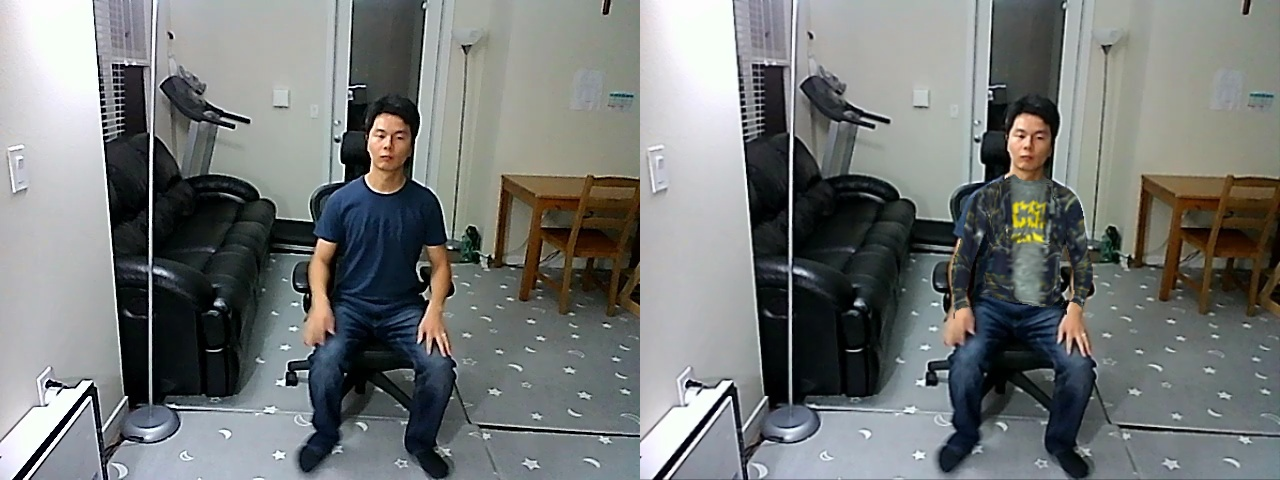

In [12]:
Image('mocap_output/rendered/00000.jpg')

In [15]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open(video_output, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# import scipy.io
# mat = scipy.io.loadmat('sample_data/YouTube_Pose_dataset_1.0/YouTube_Pose_dataset.mat')

In [ ]:
# mat['data'][:]

In [ ]:
# https://www.youtube.com/watch?v=ApIVO-1kVzY

In [ ]:
# !pip install pytube

In [ ]:
# from pytube import YouTube
# YouTube('https://www.youtube.com/watch?v=ApIVO-1kVzY').streams.first().download('sample_data/', 'man')